In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import gamma

In [2]:
## funções auxiliares
def dB(x):
    "Converte escalar para dB"
    return 10 * np.log10(x)


def dBm(x):
    "Converte escalar para dB"
    return 10 * np.log10(x / 0.001)


def escalar(x):
    "Converte dB para escalar"
    return 10 ** (x / 10)


def tratar_dados(data_txt):
    data = pd.read_csv(
        data_txt,
        sep="|",
        header=None,
        encoding="utf-8",
        names=["data", "n", "id", "mensagem", "medida"],
    )
    data = data[pd.to_numeric(data["medida"], errors="coerce").notnull()]
    return np.array(data["medida"])

In [3]:
# Process only the data that hasn't been processed yet
dados_dict = {
    "dados_caos": "caos_1.txt",
    "dados_pet": "pet_eel.txt",
    "dados_predio": "predio_ctc.txt",
    "dados_perto_1": "sala_ctc_perto.txt",
    "dados_perto_2": "sala_ctc_perto_2.txt",
    "dados_escada_ctc_1": "escada_ctc_1.txt",
    "dados_sala_ctc": "sala_ctc.txt",
}

for var_name, file_name in dados_dict.items():
    if var_name not in globals():
        globals()[var_name] = tratar_dados(file_name)

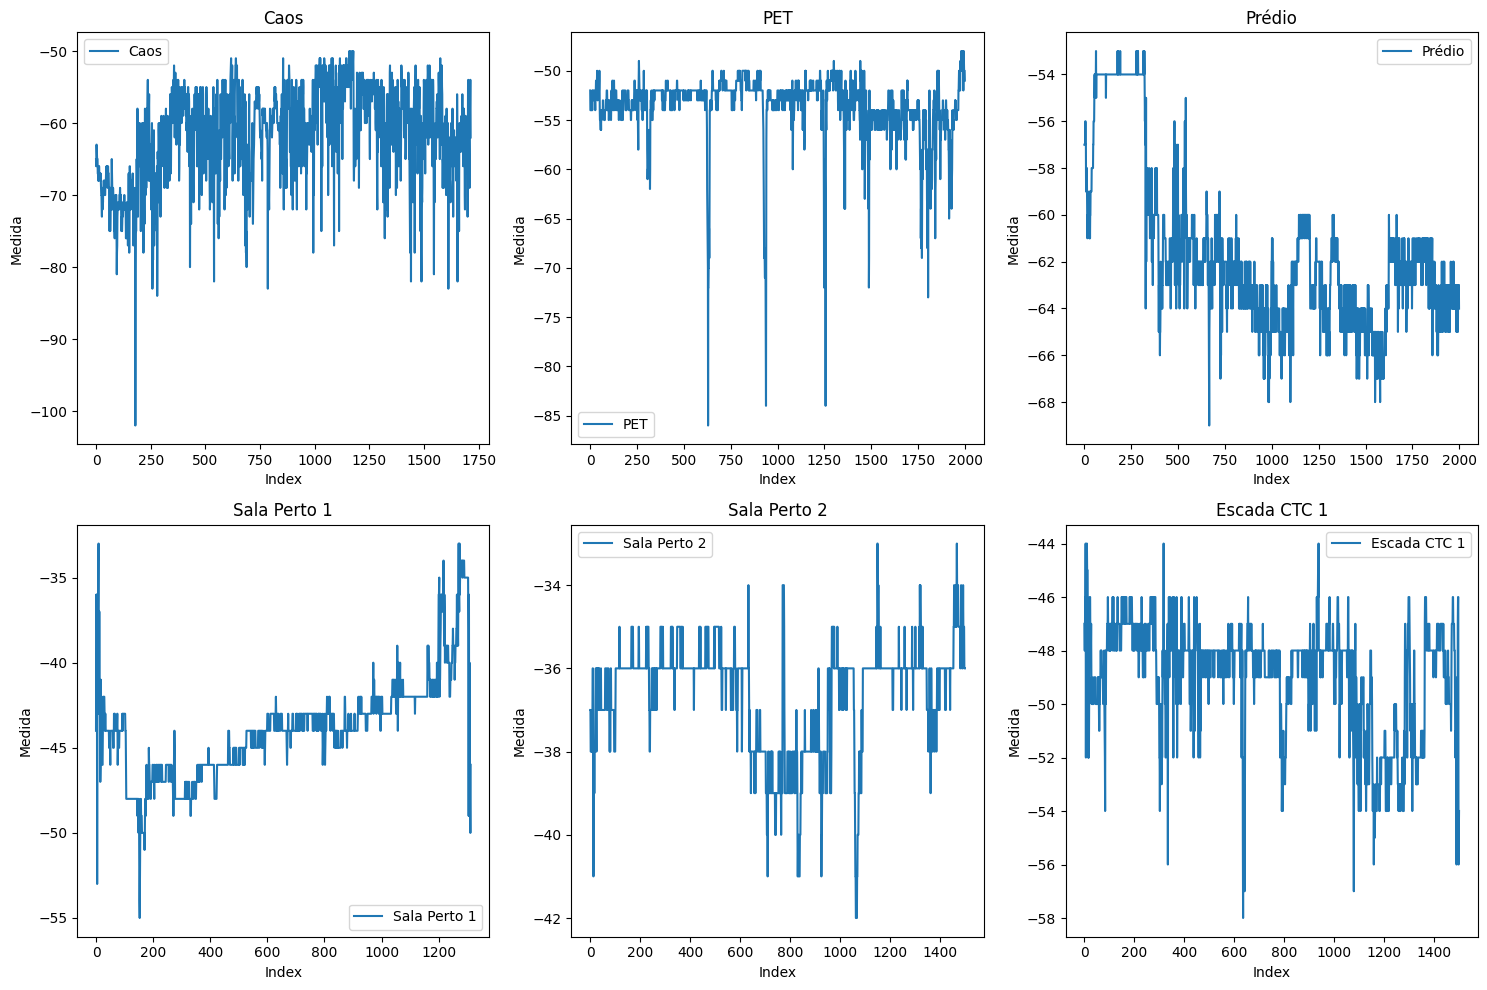

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot(dados_caos, label="Caos")
axes[0, 0].set_title("Caos")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Medida")
axes[0, 0].legend()

axes[0, 1].plot(dados_pet, label="PET")
axes[0, 1].set_title("PET")
axes[0, 1].set_xlabel("Index")
axes[0, 1].set_ylabel("Medida")
axes[0, 1].legend()

axes[0, 2].plot(dados_predio, label="Prédio")
axes[0, 2].set_title("Prédio")
axes[0, 2].set_xlabel("Index")
axes[0, 2].set_ylabel("Medida")
axes[0, 2].legend()

axes[1, 0].plot(dados_perto_1, label="Sala Perto 1")
axes[1, 0].set_title("Sala Perto 1")
axes[1, 0].set_xlabel("Index")
axes[1, 0].set_ylabel("Medida")
axes[1, 0].legend()

axes[1, 1].plot(dados_perto_2, label="Sala Perto 2")
axes[1, 1].set_title("Sala Perto 2")
axes[1, 1].set_xlabel("Index")
axes[1, 1].set_ylabel("Medida")
axes[1, 1].legend()

axes[1, 2].plot(dados_escada_ctc_1, label="Escada CTC 1")
axes[1, 2].set_title("Escada CTC 1")
axes[1, 2].set_xlabel("Index")
axes[1, 2].set_ylabel("Medida")
axes[1, 2].legend()

plt.tight_layout()
plt.show()

In [5]:
def get_fading(PR):

    # Potência recebida [mW]
    PR = 10 ** (PR / 10)

    # Potência recebida média [mW]
    PRM = np.mean(PR)

    # Cálculo o Fading
    h = np.sqrt(PR / PRM)

    return h


def calculate_moments(h, k):
    return np.mean(h**k)


def get_nakagami_m(h):
    p = 100
    m = (
        calculate_moments(h, 1 / p)
        * calculate_moments(h, 2)
        / (
            2
            * p
            * (
                calculate_moments(h, 2 + 1 / p)
                - calculate_moments(h, 1 / p) * calculate_moments(h, 2)
            )
        )
    )

    return m


def nakagami_distribution(h, m):
    return (2 * (m**m) * (h ** (2 * m - 1)) * np.exp(-m * h * h)) / gamma(m)


def plot(m, h_data, title, bins=7, axis=1):
    h = np.arange(0, 5, 0.0001)
    axes[axis, 0].hist(h_data, bins=bins, density=True, label="Medidas")
    axes[axis, 0].plot(
        h, nakagami_distribution(h, m), label="Nakagami m = " + str(round(m, 2))
    )
    axes[axis, 0].set_title(title)
    axes[axis, 0].legend()
    axes[axis, 0].grid()


def plot_medidas(row, data, label):
    axes[row, 1].plot(data, label=label)
    axes[row, 1].set_title(label)
    axes[row, 1].set_xlabel("Index")
    axes[row, 1].set_ylabel("Medida")
    axes[row, 1].legend()


def plot_image(image_path, title="", row=0):
    # Create a random image using numpy
    image = plt.imread(f"./fotos/{image_path}")

    # Plot the image using matplotlib
    axes[row, 2].imshow(image)
    axes[row, 2].set_title(f"{title}")
    axes[row, 2].axis("off")


def process_data(data, title, bins=10, axis=0, foto_path=None):
    h = get_fading(data)
    m = get_nakagami_m(h)
    plot_medidas(axis, data, title)
    plot(m, h, title, bins=bins, axis=axis)
    if foto_path is not None:
        plot_image(foto_path, title, axis)
    return m, h

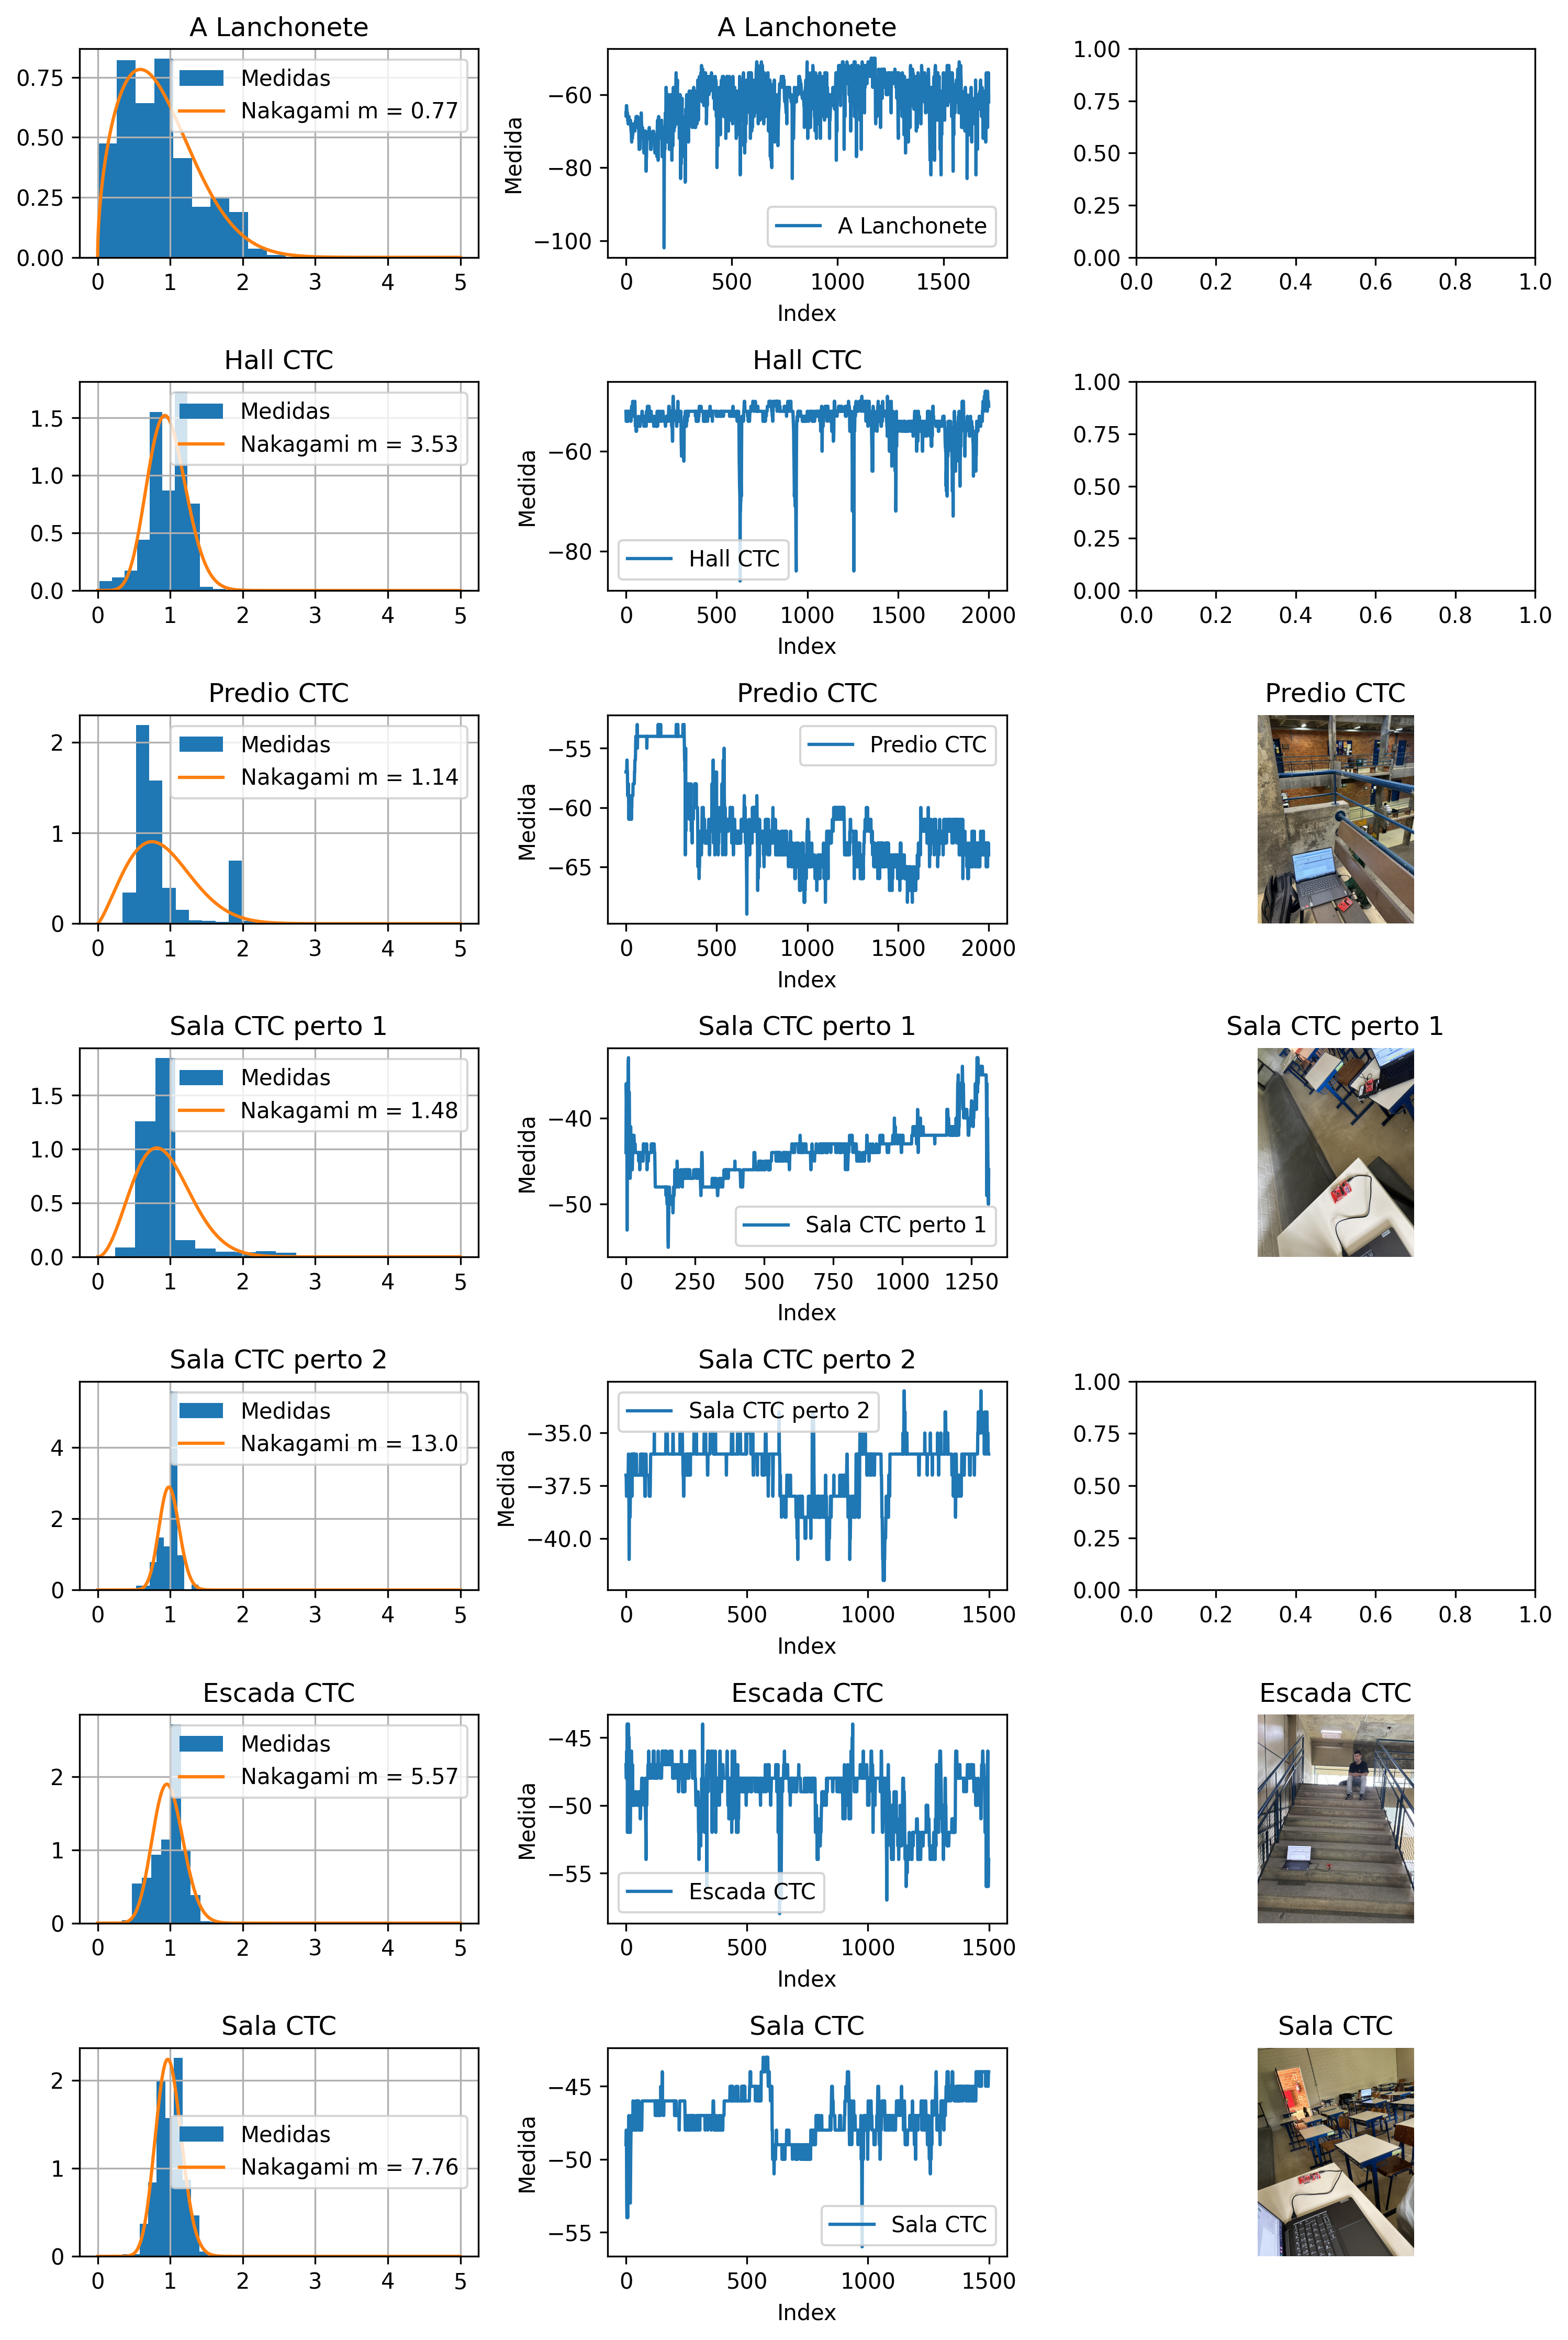

In [6]:
fig, axes = plt.subplots(7, 3, figsize=(10, 15), dpi=300)

# Calcular os momentos e o estimador m_p para cada conjunto de dados
m_caos, h_caos = process_data(dados_caos, "A Lanchonete", axis=0)
m_pet, h_pet = process_data(dados_pet, "Hall CTC", axis=1)
m_predio, h_predio = process_data(
    dados_predio, "Predio CTC", axis=2, foto_path="predio_ctc.JPEG"
)
m_perto_1, h_perto_1 = process_data(
    dados_perto_1, "Sala CTC perto 1", axis=3, foto_path="sala_perto.JPEG"
)
m_perto_2, h_perto_2 = process_data(dados_perto_2, "Sala CTC perto 2", axis=4)
m_escada_ctc_1, h_escada_ctc_1 = process_data(
    dados_escada_ctc_1, "Escada CTC", axis=5, foto_path="escada_ctc.JPEG"
)
m_sala_ctc, h_sala_ctc = process_data(
    dados_sala_ctc, "Sala CTC", axis=6, foto_path="sala_longe.JPEG"
)

plt.tight_layout()
plt.savefig("resultados.pdf")
plt.show()

Estimated Nakagami m parameter: 0.7777059226221804
Location parameter: 0


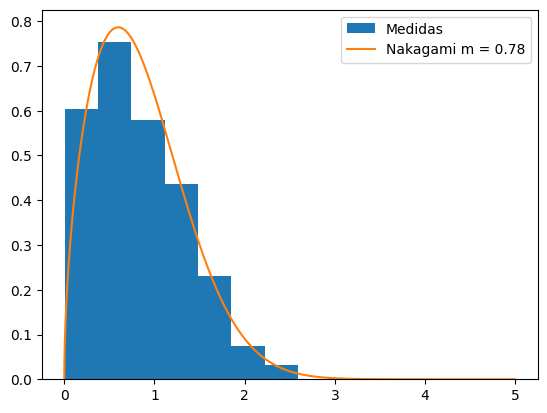

In [7]:
from scipy.stats import nakagami


def fit_nakagami_distribution(data):
    # Fit the data to the Nakagami distribution
    # Fix the location parameter to zero since Nakagami distribution is defined for x >= 0
    params = nakagami.fit(data, floc=0)

    # Extract the shape parameter m (Nakagami m parameter), location, and scale
    m, loc, scale = params
    h = np.arange(0, 5, 0.0001)

    print(f"Estimated Nakagami m parameter: {m}")
    print(f"Location parameter: {loc}")
    # print(f"Scale parameter: {scale}")
    plt.hist(data, bins=7, density=True, label="Medidas")
    plt.plot(h, nakagami_distribution(h, m), label="Nakagami m = " + str(round(m, 2)))
    plt.legend()
    plt.show()

    return m, loc, scale


# Example usage
m, loc, scale = fit_nakagami_distribution(h_caos)